# 학습 데이터 생성

In [17]:
import torch

x_train = torch.FloatTensor([[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]])
y_train = torch.FloatTensor([[1],[1],[1],[0],[0],[0],[0],[1],[0],[1],[1],[1]])

In [18]:
W = torch.zeros(1, 1)
b = torch.zeros(1, 1)
lr = 1.0

In [19]:
for epoch in range(3001):
    W.requires_grad_(True)
    b.requires_grad_(True)

    hypothesis = torch.sigmoid(torch.mm(x_train, W) + b)
    cost = torch.mean(y_train * -torch.log(hypothesis) + (1-y_train) * -torch.log(1-hypothesis))

    cost.backward()
    with torch.no_grad() as grd:
        W = W - lr * W.grad
        b = b - lr * b.grad
    
    if epoch % 100 == 0:
        print( 'epoch: {}, cost: {:.6f}, W: {:.6f}, b: {:.6f}'.format(epoch, cost.item(), W.squeeze(), b.squeeze()))

epoch: 0, cost: 0.693147, W: -0.154167, b: 0.083333
epoch: 100, cost: 0.420221, W: -1.451281, b: 4.406925
epoch: 200, cost: 0.398721, W: -1.898433, b: 5.773750
epoch: 300, cost: 0.390820, W: -2.174322, b: 6.609553
epoch: 400, cost: 0.387009, W: -2.367329, b: 7.191599
epoch: 500, cost: 0.384924, W: -2.510626, b: 7.622530
epoch: 600, cost: 0.383699, W: -2.620779, b: 7.953164
epoch: 700, cost: 0.382944, W: -2.707397, b: 8.212804
epoch: 800, cost: 0.382463, W: -2.776597, b: 8.420023
epoch: 900, cost: 0.382149, W: -2.832521, b: 8.587363
epoch: 1000, cost: 0.381941, W: -2.878112, b: 8.723699
epoch: 1100, cost: 0.381801, W: -2.915530, b: 8.835541
epoch: 1200, cost: 0.381706, W: -2.946401, b: 8.927779
epoch: 1300, cost: 0.381641, W: -2.971979, b: 9.004180
epoch: 1400, cost: 0.381596, W: -2.993242, b: 9.067673
epoch: 1500, cost: 0.381565, W: -3.010968, b: 9.120598
epoch: 1600, cost: 0.381543, W: -3.025776, b: 9.164800
epoch: 1700, cost: 0.381528, W: -3.038172, b: 9.201797
epoch: 1800, cost: 0.3

In [20]:
x_test = torch.FloatTensor([[4.5], [1.1]])
test_result = torch.sigmoid(torch.mm(x_test, W)+b)
print(torch.round(test_result))

tensor([[0.],
        [1.]])


# Scikit-learn을 사용한 구현

In [22]:
from sklearn.linear_model import LogisticRegression

x_train = [[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]]
y_train = [1,1,1,0,0,0,0,1,0,1,1,1] # 입력 shape이 pytorch에서와 다름에 주의!

model = LogisticRegression(penalty=None)
model.fit(x_train, y_train)

print(model.coef_, model.intercept_)

x_test = [[4.5], [1.1]]
test_result = model.predict(x_test)
print(test_result)

[[-3.10428163]] [9.39919938]
[0 1]


# optimizer 사용해보기

In [29]:
import torch

x_train = torch.FloatTensor([[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]])
y_train = torch.FloatTensor([[1],[1],[1],[0],[0],[0],[0],[1],[0],[1],[1],[1]])

W = torch.zeros(1, 1)
b = torch.zeros(1, 1)
lr = 1.0

optimizer = torch.optim.SGD([W, b], lr =1.0)

for epoch in range(3001):
    W.requires_grad_(True)
    b.requires_grad_(True)

    hypothesis = torch.sigmoid(torch.mm(x_train, W) + b)
    cost = torch.mean(y_train * -torch.log(hypothesis) + (1-y_train) * -torch.log(1-hypothesis))

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print("epoch: {}, cost: {:.6f}, weight: {:.6f}, bias: {:.6f}".format(epoch, cost.item(), W.squeeze(), b.squeeze()))

epoch: 0, cost: 0.693147, weight: -0.154167, bias: 0.083333
epoch: 100, cost: 0.420221, weight: -1.451281, bias: 4.406925
epoch: 200, cost: 0.398721, weight: -1.898433, bias: 5.773750
epoch: 300, cost: 0.390820, weight: -2.174322, bias: 6.609553
epoch: 400, cost: 0.387009, weight: -2.367329, bias: 7.191599
epoch: 500, cost: 0.384924, weight: -2.510626, bias: 7.622530
epoch: 600, cost: 0.383699, weight: -2.620779, bias: 7.953164
epoch: 700, cost: 0.382944, weight: -2.707397, bias: 8.212804
epoch: 800, cost: 0.382463, weight: -2.776597, bias: 8.420023
epoch: 900, cost: 0.382149, weight: -2.832521, bias: 8.587363
epoch: 1000, cost: 0.381941, weight: -2.878112, bias: 8.723699
epoch: 1100, cost: 0.381801, weight: -2.915530, bias: 8.835541
epoch: 1200, cost: 0.381706, weight: -2.946401, bias: 8.927779
epoch: 1300, cost: 0.381641, weight: -2.971979, bias: 9.004180
epoch: 1400, cost: 0.381596, weight: -2.993242, bias: 9.067673
epoch: 1500, cost: 0.381565, weight: -3.010968, bias: 9.120598
epoc

# Matplotlib으로 결과 시각화

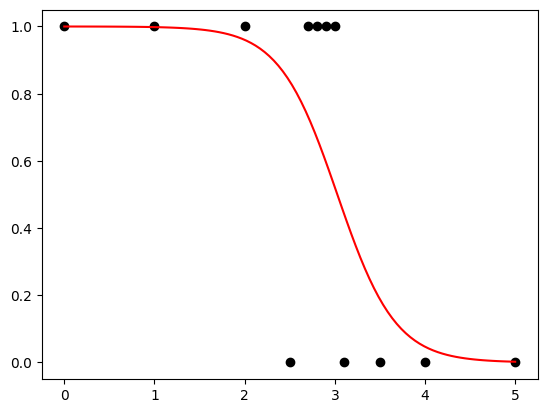

In [31]:
import matplotlib.pyplot as plt

W.requires_grad_(False)
b.requires_grad_(False)

plt.scatter(x_train, y_train, c="black")

X = torch.linspace(0, 5, 100).unsqueeze(1)
Y = torch.sigmoid(torch.mm(X, W) + b)
plt.plot(X, Y, c="#ff0000")
plt.show()